# Test ms2deepscore model
The model made based on the GNPS library of 24-11-2021 is compared to the previous model, to test if it performce similar

In [8]:
import os 
import pickle
from ms2deepscore.models import load_model as load_ms2ds_model
from ms2deepscore import MS2DeepScore
from matplotlib import pyplot as plt


data_folder = "C:/Users/jonge094/PycharmProjects/PhD_MS2Query/ms2query/data"


In [5]:
new_model = load_ms2ds_model(os.path.join(data_folder, "gnps_24_11_2021/positive_mode/trained_models/ms2ds_GNPS_25_11_2021.hdf5"))
old_model = load_ms2ds_model(os.path.join(data_folder, "models_embeddings_files/ms2ds_20210420-141937_data210409_10k_500_500_200.hdf5"))
history = pickle.load(open(os.path.join(data_folder, "gnps_24_11_2021/positive_mode/trained_models/GNPS_25_11_2021_training_history.pickle"), "rb"))

In [23]:
new_model_checkpointer = load_ms2ds_model(os.path.join(data_folder, "gnps_24_11_2021/positive_mode/trained_models/GNPS_25_11_2021.hdf5"))

KeyError: "Can't open attribute (can't locate attribute: 'spectrum_binner')"

In [9]:
def plot_history(history):
    """Plots the MAE and MSE loss for the history of a trained model"""
    _, (ax1, ax2) = plt.subplots(2, 1, sharex="all", figsize=(12, 8),
                                   dpi=100)

    ax1.plot(history['mae'], "o--", label='Acuracy (training data)')
    ax1.plot(history['val_mae'], "o--", label='Acuracy (validation data)')
    ax1.set_title('MAE loss')
    ax1.set_ylabel("MAE")
    ax1.legend()

    ax2.plot(history['loss'], "o--", label='training data')
    ax2.plot(history['val_loss'], "o--", label='validation data')
    ax2.set_title('MSE loss')
    ax2.set_ylabel("MSE loss")
    ax2.set_xlabel("epochs")
    ax2.legend()
    plt.show()

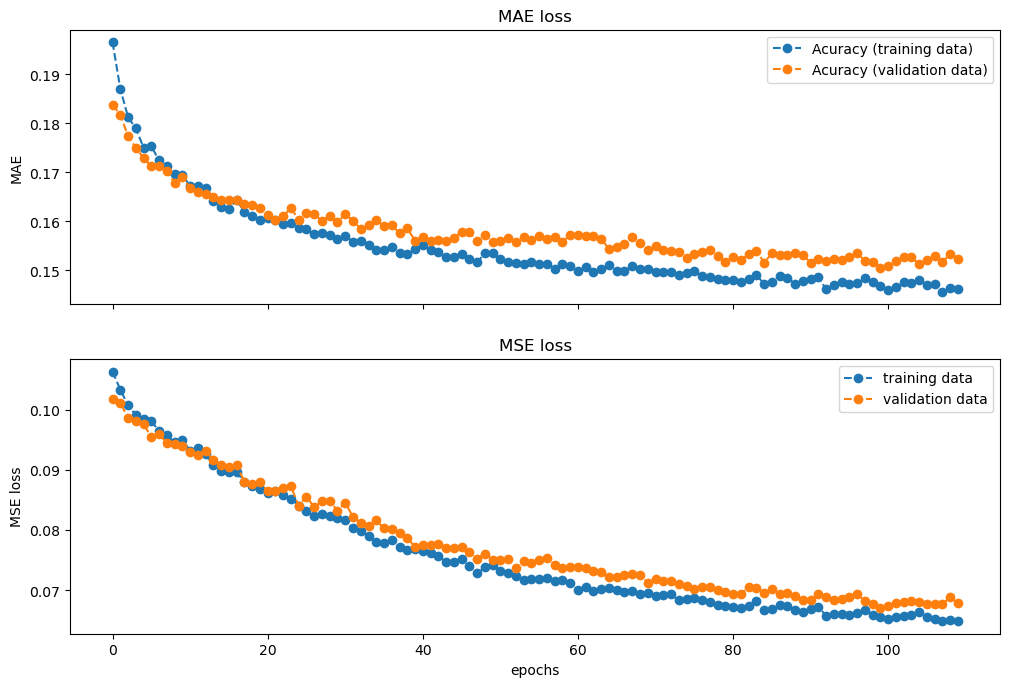

In [10]:
plot_history(history)

In [13]:
validation_spectra = pickle.load(open("C:/Users/jonge094/PycharmProjects/PhD_MS2Query/ms2query/data/gnps_24_11_2021/positive_mode/GNPS_24_11_2021_pos_val_250_inchikeys.pickle", "rb"))

In [14]:
results = MS2DeepScore(new_model).matrix(validation_spectra[:10], validation_spectra[:10])

Calculating vectors of reference spectrums: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 16.06it/s]


In [19]:
for line in results:
    for score in line:
        print(f"{score:.2f}")

1.00
0.46
0.43
0.50
0.47
0.51
0.47
0.56
0.58
0.53
0.46
1.00
0.35
0.35
0.38
0.39
0.37
0.40
0.42
0.40
0.43
0.35
1.00
0.96
0.95
0.89
0.95
0.84
0.75
0.88
0.50
0.35
0.96
1.00
0.95
0.90
0.93
0.88
0.82
0.92
0.47
0.38
0.95
0.95
1.00
0.94
0.96
0.92
0.85
0.93
0.51
0.39
0.89
0.90
0.94
1.00
0.93
0.89
0.81
0.92
0.47
0.37
0.95
0.93
0.96
0.93
1.00
0.89
0.81
0.92
0.56
0.40
0.84
0.88
0.92
0.89
0.89
1.00
0.96
0.97
0.58
0.42
0.75
0.82
0.85
0.81
0.81
0.96
1.00
0.92
0.53
0.40
0.88
0.92
0.93
0.92
0.92
0.97
0.92
1.00


In [21]:
print(len(validation_spectra))

3334


In [20]:
results = MS2DeepScore(old_model).matrix(validation_spectra[:10], validation_spectra[:10])
for line in results:
    for score in line:
        print(f"{score:.2f}")


Calculating vectors of reference spectrums: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 16.31it/s]

1.00
0.47
0.43
0.41
0.41
0.41
0.38
0.41
0.40
0.39
0.47
1.00
0.70
0.73
0.74
0.70
0.64
0.72
0.70
0.71
0.43
0.70
1.00
0.86
0.97
0.94
0.90
0.86
0.83
0.91
0.41
0.73
0.86
1.00
0.89
0.94
0.95
0.92
0.86
0.95
0.41
0.74
0.97
0.89
1.00
0.96
0.90
0.87
0.82
0.92
0.41
0.70
0.94
0.94
0.96
1.00
0.95
0.90
0.83
0.95
0.38
0.64
0.90
0.95
0.90
0.95
1.00
0.92
0.88
0.96
0.41
0.72
0.86
0.92
0.87
0.90
0.92
1.00
0.96
0.95
0.40
0.70
0.83
0.86
0.82
0.83
0.88
0.96
1.00
0.93
0.39
0.71
0.91
0.95
0.92
0.95
0.96
0.95
0.93
1.00


In [44]:
results = MS2DeepScore(new_model_hdf5).matrix(validation_spectra[:10], validation_spectra[:10])
for line in results:
    for score in line:
        print(score)

Calculating vectors of reference spectrums: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 34.10it/s]

1.0000000000000004
0.4111077702312307
0.3662505939115033
0.4051882807420052
0.3971414464649738
0.4014015309739277
0.3881409975054813
0.4626643610333688
0.47689732537982077
0.45846705164478674
0.4111077702312307
1.0000000000000004
0.3905341388085891
0.36244226581382594
0.3857579768649064
0.3850914592142829
0.429744751114349
0.38031844194680664
0.422923669293977
0.46606284862460273
0.3662505939115033
0.3905341388085891
1.0000000000000004
0.7304709280684527
0.8469939882973643
0.8751260394751534
0.8667080883395466
0.6734211167820241
0.6867250734317064
0.8180134301206365
0.4051882807420052
0.36244226581382594
0.7304709280684527
1.0000000000000004
0.8384369955666331
0.8072374095062556
0.8679549683368
0.7365822405550724
0.681708621224181
0.7875159502473212
0.3971414464649738
0.3857579768649064
0.8469939882973643
0.8384369955666331
1.0
0.9248636072825192
0.837789698603206
0.6776169296727663
0.6325890767415095
0.8039372853871204
0.4014015309739277
0.3850914592142829
0.8751260394751534
0.8072374

In [21]:
import numpy as np
from matchms import calculate_scores
from matchms import Spectrum
from matchms.filtering import add_fingerprint
from matchms.similarity import FingerprintSimilarity
from tqdm.notebook import tqdm

# Add fingerprints
fingerprints = [add_fingerprint(x, nbits=2048) for x in tqdm(validation_spectra[:10])]
# Specify type and calculate similarities
similarity_measure = FingerprintSimilarity("jaccard")
scores = calculate_scores(fingerprints, fingerprints, similarity_measure, is_symmetric=True)

  0%|          | 0/10 [00:00<?, ?it/s]

In [22]:
for line in scores.scores:
    for score in line:
        print(f"{score:.2f}")        

1.00
0.25
0.26
0.26
0.26
0.26
0.26
0.26
0.26
0.26
0.25
1.00
0.40
0.40
0.40
0.40
0.40
0.40
0.40
0.40
0.26
0.40
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
0.26
0.40
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
0.26
0.40
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
0.26
0.40
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
0.26
0.40
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
0.26
0.40
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
0.26
0.40
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
0.26
0.40
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00


# check s2vec

In [24]:
from gensim.models import Word2Vec


new_model = Word2Vec.load(os.path.join(data_folder, "gnps_24_11_2021/positive_mode/spec2vec_models/spec2vec_model_GNPS_24_11_2021.model"))
old_model = Word2Vec.load(os.path.join(data_folder, "models_embeddings_files/ALL_GNPS_210409_Spec2Vec_ms2query.model"))


c:\users\jonge094\anaconda3\envs\ms2query\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [35]:
from ms2query.spectrum_processing import create_spectrum_documents
from spec2vec.Spec2Vec import Spec2Vec
from spec2vec.vector_operations import cosine_similarity_matrix, calc_vector
import numpy as np

results = Spec2Vec(old_model, allowed_missing_percentage= 100).matrix(validation_spectra[:10], validation_spectra[:10])
for line in results:
    for score in line:
        print(f"{score:.2f}")

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.92%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.20%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.92%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.20%.
1.00
0.03
-0.03
0.01
-0.03
-0.06
-0.02
-0.04
-0.02
-0.05
0.03
1.00
0.04
0.06
0.02
0.06
0.03
0.02
-0.03
0.04
-0.03
0.04
1.00
0.79
0.83
0.82
0.87
0.79
0.77
0.77
0.01
0.06
0.79
1.00
0.81
0.81
0.84
0.78
0.73
0.76
-0.03
0.02
0.83
0.81
1.00
0.88
0.90
0.80
0.75
0.80
-0.06
0.06
0.82
0.81
0.88
1.00
0.88
0.80
0.73
0.81
-0.02
0.03
0.87
0.84
0.90
0.88
1.00
0.83
0.79
0.83
-0.04
0.02
0.79
0.78
0.80
0.80
0.83
1.00
0.87
0.83
-0.02
-0.03
0.77
0.73
0.75
0.73
0.79
0.87
1.00
0.78
-0.05
0.04
0.77
0.76
0.80
0.81
0.83
0.83
0.78
1.00


In [36]:
results = Spec2Vec(new_model, allowed_missing_percentage= 100).matrix(validation_spectra[:10], validation_spectra[:10])
for line in results:
    for score in line:
        print(f"{score:.2f}")

1.00
0.04
-0.11
-0.11
-0.11
-0.12
-0.09
-0.10
-0.14
-0.14
0.04
1.00
-0.06
-0.02
-0.05
-0.03
-0.06
-0.01
-0.04
-0.06
-0.11
-0.06
1.00
0.91
0.93
0.94
0.93
0.92
0.86
0.89
-0.11
-0.02
0.91
1.00
0.94
0.93
0.93
0.90
0.87
0.90
-0.11
-0.05
0.93
0.94
1.00
0.95
0.95
0.93
0.90
0.93
-0.12
-0.03
0.94
0.93
0.95
1.00
0.94
0.92
0.88
0.91
-0.09
-0.06
0.93
0.93
0.95
0.94
1.00
0.92
0.88
0.90
-0.10
-0.01
0.92
0.90
0.93
0.92
0.92
1.00
0.89
0.91
-0.14
-0.04
0.86
0.87
0.90
0.88
0.88
0.89
1.00
0.88
-0.14
-0.06
0.89
0.90
0.93
0.91
0.90
0.91
0.88
1.00
